In [122]:
import numpy as np
import pandas as pd
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout
from sklearn.datasets import make_classification 

In [123]:
X,y=make_classification(n_samples=400,n_features=2,n_informative=2,n_redundant=0,n_classes=2,n_clusters_per_class=2)

In [124]:
import matplotlib.pyplot as plt

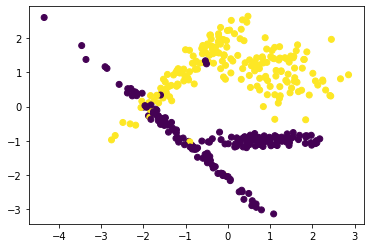

In [125]:
plt.scatter(X[:,0],X[:,1],c=y[:])

In [126]:
X.shape

(400, 2)

In [127]:
y.shape

(400,)

In [128]:
from sklearn.model_selection import train_test_split

In [129]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [130]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((300, 2), (100, 2), (300,), (100,))

## **Model1 is used for traning without Dropout**

In [131]:
model1=Sequential()

In [132]:
model1.add(Dense(128,activation='relu',kernel_initializer='he_normal',input_dim=2))
model1.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model1.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model1.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model1.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model1.add(Dense(1,activation='sigmoid'))

In [133]:
model1.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [134]:
history1=model1.fit(X_train,y_train,batch_size=50,epochs=500,validation_data=(X_test,y_test))

Epoch 1/500
6/6 [==============================] - 1s 30ms/step - loss: 0.4584 - accuracy: 0.7933 - val_loss: 0.2890 - val_accuracy: 0.9200
Epoch 2/500
6/6 [==============================] - 0s 6ms/step - loss: 0.2440 - accuracy: 0.9133 - val_loss: 0.2219 - val_accuracy: 0.8900
Epoch 3/500
6/6 [==============================] - 0s 6ms/step - loss: 0.2180 - accuracy: 0.9133 - val_loss: 0.2192 - val_accuracy: 0.9000
Epoch 4/500
6/6 [==============================] - 0s 6ms/step - loss: 0.2176 - accuracy: 0.9100 - val_loss: 0.2085 - val_accuracy: 0.9000
Epoch 5/500
6/6 [==============================] - 0s 6ms/step - loss: 0.2260 - accuracy: 0.9100 - val_loss: 0.2133 - val_accuracy: 0.9000
Epoch 6/500
6/6 [==============================] - 0s 7ms/step - loss: 0.2231 - accuracy: 0.8900 - val_loss: 0.2079 - val_accuracy: 0.9300
Epoch 7/500
6/6 [==============================] - 0s 6ms/step - loss: 0.2012 - accuracy: 0.9133 - val_loss: 0.1991 - val_accuracy: 0.8900
Epoch 8/500
6/6 [=========

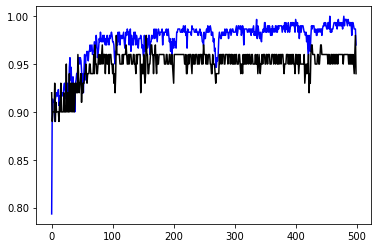

In [135]:
plt.plot(history1.history['accuracy'],c='blue')
plt.plot(history1.history['val_accuracy'],c='black')

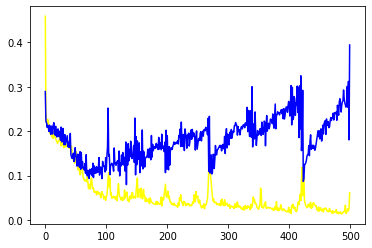

In [152]:
plt.plot(history1.history['loss'],c='yellow')
plt.plot(history1.history['val_loss'],c='blue')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


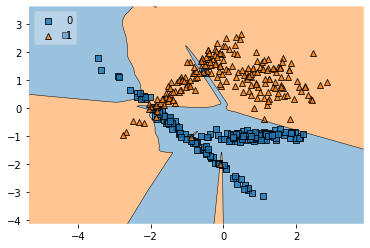

In [137]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'),clf=model1,legend=2)

In [138]:
train_mse=model1.evaluate(X_train,y_train,verbose=0)
test_mse=model1.evaluate(X_test,y_test,verbose=0)
print(train_mse,test_mse)

[0.07817085087299347, 0.9733333587646484] [0.39377203583717346, 0.9399999976158142]


In [139]:
print(train_mse[0]-test_mse[0])

-0.31560118496418


# **Model2 is used for traning with Dropout**

In [140]:
model2=Sequential()

In [141]:
model2.add(Dense(128,activation='relu',kernel_initializer='he_normal',input_dim=2))
model2.add(Dropout(0.2))
model2.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model2.add(Dropout(0.2))
model2.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model2.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model2.add(Dropout(0.2))
model2.add(Dense(128,activation='relu',kernel_initializer='he_normal'))
model2.add(Dense(1,activation='sigmoid'))

In [142]:
model2.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [143]:
history2=model2.fit(X_train,y_train,batch_size=50,epochs=500,validation_data=(X_test,y_test))

Epoch 1/500
6/6 [==============================] - 1s 33ms/step - loss: 0.6141 - accuracy: 0.7333 - val_loss: 0.3103 - val_accuracy: 0.9100
Epoch 2/500
6/6 [==============================] - 0s 10ms/step - loss: 0.3653 - accuracy: 0.8867 - val_loss: 0.2852 - val_accuracy: 0.8900
Epoch 3/500
6/6 [==============================] - 0s 7ms/step - loss: 0.3756 - accuracy: 0.8933 - val_loss: 0.2642 - val_accuracy: 0.9100
Epoch 4/500
6/6 [==============================] - 0s 8ms/step - loss: 0.2627 - accuracy: 0.9067 - val_loss: 0.2258 - val_accuracy: 0.9100
Epoch 5/500
6/6 [==============================] - 0s 8ms/step - loss: 0.2820 - accuracy: 0.8900 - val_loss: 0.2041 - val_accuracy: 0.8900
Epoch 6/500
6/6 [==============================] - 0s 6ms/step - loss: 0.2482 - accuracy: 0.9000 - val_loss: 0.1967 - val_accuracy: 0.8900
Epoch 7/500
6/6 [==============================] - 0s 6ms/step - loss: 0.2783 - accuracy: 0.8800 - val_loss: 0.1958 - val_accuracy: 0.9000
Epoch 8/500
6/6 [========

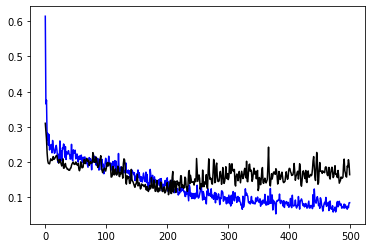

In [144]:
plt.plot(history2.history['loss'],c='blue')
plt.plot(history2.history['val_loss'],c='black')

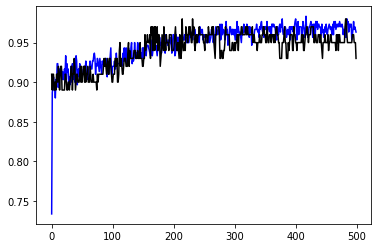

In [145]:
plt.plot(model2.history.history['accuracy'],c='blue')
plt.plot(model2.history.history['val_accuracy'],c='black')

In [146]:
train_mse2=model2.evaluate(X_train,y_train,verbose=0)
test_mse2=model2.evaluate(X_test,y_test,verbose=0)
print(train_mse2,test_mse2)

[0.05667750537395477, 0.9766666889190674] [0.16445091366767883, 0.9300000071525574]


In [147]:
print(train_mse2[0]-test_mse2[0])

-0.10777340829372406
